# **Importowanie bibliotek**

In [114]:
import pandas as pd
import numpy as np


!pip install regex
import regex as re

df_tweety = pd.read_csv("/content/dane3_ten_plik - dane3.csv")

!pip install spacy -U
!python -m spacy download pl_core_news_lg

import spacy
nlp = spacy.load("pl_core_news_lg")

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 573.7/573.7 MB 2.1 MB/s eta 0:00:00
‚úî Download and installation successful
You can now load the package via spacy.load('pl_core_news_lg')
‚ö† Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


# **1 czƒô≈õƒá**

In [115]:
#1 Zamie≈Ñ skr√≥ty nazw dni tygodnia na polskie odpowiedniki (pe≈Çne nazwy dni tygodnia) - kolumna created_at
df_tweety["created_at"] = [wiersz.replace("Mon","Poniedzia≈Çek").replace("Tue","Wtorek").replace("Wed","≈öroda").replace("Thu","Czwartek").replace("Fri","PiƒÖtek").replace("Sat","Sobota").replace("Sun","Niedziela") for wiersz in df_tweety["created_at"]]
print(df_tweety["created_at"]) #dla testu

0       Poniedzia≈Çek Jul 05 07:58:09 +0000 2021
1       Poniedzia≈Çek Jul 05 08:21:28 +0000 2021
2       Poniedzia≈Çek Jul 05 12:50:04 +0000 2021
3       Poniedzia≈Çek Jul 05 06:33:46 +0000 2021
4       Poniedzia≈Çek Jul 05 11:13:20 +0000 2021
                         ...                   
1945           ≈öroda Jun 30 08:10:33 +0000 2021
1946           ≈öroda Jun 30 08:33:10 +0000 2021
1947           ≈öroda Jun 30 07:17:38 +0000 2021
1948           ≈öroda Jun 30 09:37:47 +0000 2021
1949           ≈öroda Jun 30 07:54:27 +0000 2021
Name: created_at, Length: 1950, dtype: object


In [116]:
#2 Zamie≈Ñ skr√≥ty nazw miesiƒôcy na liczbowe odpowiedniki (np Jun na 06) - kolumna user_created_at
df_tweety["user_created_at"] = [wiersz.replace("Jan", "01").replace("Feb", "02").replace("Mar", "03").replace("Apr", "04").replace("May", "05").replace("Jun", "06").replace("Jul", "07").replace("Aug", "08").replace("Sep", "09").replace("Oct", "10").replace("Nov", "11").replace("Dec", "12") for wiersz in df_tweety["user_created_at"]]
print(df_tweety["user_created_at"])

0       Mon 02 08 16:44:23 +0000 2021
1       Wed 07 16 13:54:38 +0000 2014
2       Thu 05 07 21:18:59 +0000 2015
3       Thu 07 27 06:30:20 +0000 2017
4       Mon 03 02 13:22:28 +0000 2015
                    ...              
1945    Mon 08 03 12:49:55 +0000 2020
1946    Sat 06 15 21:33:26 +0000 2019
1947    Sun 08 16 15:31:55 +0000 2009
1948    Thu 02 10 11:46:59 +0000 2011
1949    Fri 06 12 18:04:14 +0000 2020
Name: user_created_at, Length: 1950, dtype: object


In [117]:
#3 Pobierz wszystkie linki do tweet√≥w i przeka≈º je do listy.
listaZLinkamiDoTweetow = df_tweety['tweet_url'].tolist()
print(listaZLinkamiDoTweetow)

['https://twitter.com/NieOddac/status/1411957559712432128', 'https://twitter.com/MeteoprognozaPL/status/1411963424221941763', 'https://twitter.com/jolaiza29/status/1412031023588708352', 'https://twitter.com/PogodaMeteo/status/1411936323779371013', 'https://twitter.com/WESLEYROBERTART/status/1412006678275448834', 'https://twitter.com/SDGsbot/status/1411946061564985349', 'https://twitter.com/iSokolkaeu/status/1411964452921122816', 'https://twitter.com/Squabercom/status/1412024990497656836', 'https://twitter.com/SolskaAda/status/1411970011992891394', 'https://twitter.com/PogodaMeteo/status/1411996139604357122', 'https://twitter.com/TestateTornado/status/1411993985946734595', 'https://twitter.com/PerfectDilemma2/status/1412029598758588419', 'https://twitter.com/tytus_de_zoo_/status/1412035207608348675', 'https://twitter.com/PogodaMeteo/status/1411968124627324930', 'https://twitter.com/TerazSrodowisko/status/1411976056249237505', 'https://twitter.com/RafalDudkiewic1/status/14120316949374648

In [118]:
#4 - Pobieranie link√≥w z tweet√≥w i przekazywanie ich do listy (kolumna urls)

#WERSJA B - chyba jednak o to chodzi≈Ço (ale poni≈ºej druga opcja)
listaLinkiZTweetow = []

for element in df_tweety["text"]:
  znajdzLink = re.findall(r'(https?://\S+)', element)
  if len(znajdzLink) != 0:
    for i in range(len(znajdzLink)):
      listaLinkiZTweetow.append(znajdzLink[i])

#print(len(listaLinkiZTweetow))
print(listaLinkiZTweetow)



#WERSJA A - ale chyba jednak nie o to chodzi≈Ço
# for i in range(len(df_tweety["text"])):
#   znaleziony_link = re.findall(r'(https?://\S+)', df_tweety["text"][i]) #szukam link√≥w w tek≈õcie
#   if len(znaleziony_link) != 0: # je≈õli znalaz≈Çam link, to bƒôdƒô go chcia≈Ça dodaƒá, w innym przypadku nie ma sensu ruszaƒá innej kolumny
#     if type(df_tweety["urls"][i]) == str or (type(df_tweety["urls"][i]) == list and len(df_tweety["urls"][i]) !=0): #pytchon tu g≈Çupieje i raz mi pokazuje typ str, innym razem list, a jeszcze innym float bo nan wiƒôc chcƒô siƒô zabezpieczyƒá przed b≈Çƒôdami
#       znaleziony_link.append(df_tweety["urls"][i]) #≈ÇƒÖczƒô ze sobƒÖ listy link√≥w
#       df_tweety["urls"][i] = znaleziony_link # podmieniam zawarto≈õƒá w kolumnie na po≈ÇƒÖczonƒÖ listƒô link√≥w
#     else:
#       df_tweety["urls"][i] = znaleziony_link #podmieniam pustƒÖ zawarto≈õƒá na znaleziony w tek≈õcie link

['https://t.co/xsyokVwH5B', 'https://t.co/PzSh6ly5nA', 'https://t.co/xsyokVwH5B', 'https://t.co/SSuHMmbNRR', 'https://t.co/FNfzOW5bPl', 'https://t.co/wMu4viUDI8', 'https://t.co/jI5EH3dg6w', 'https://t.co/ZbHyBLJXbW', 'https://t.co/Zr1GwBF1g9', 'https://t.co/3zOj2JFYSY', 'https://t.co/Utl5xuKpuN', 'https://t.co/GNPULmEKIC', 'https://t.co/toK4Cuo2M4', 'https://t.co/19wJNUvgpG', 'https://t.co/ZbHyBLJXbW', 'https://t.co/GNPULmEKIC', 'https://t.co/cew5hgPwGG', 'https://t.co/wMu4viUDI8', 'https://t.co/vQsFN4KQEI', 'https://t.co/ZbHyBLJXbW', 'https://t.co/Xa9YqvNW8I', 'https://t.co/XQMfQhNq8o', 'https://t.co/XQMfQhNq8o', 'https://t.co/QxWPNMHIrC', 'https://t.co/r7jmO53I37', 'https://t.co/ksiy0pUYNJ', 'https://t.co/18qbE4M5Ie', 'https://t.co/fiQzL9JAcc', 'https://t.co/ZbHyBLJXbW', 'https://t.co/CNivAiOsTY', 'https://t.co/ZbHyBLJXbW', 'https://t.co/PzSh6ly5nA', 'https://t.co/OVrTS93Ehp', 'https://t.co/ZbHyBLJXbW', 'https://t.co/GNPULmEKIC', 'https://t.co/r7jmO53I37', 'https://t.co/jfUlmoUPAK', 

In [119]:
#5 - Pobierz wszystkie linki do obrazk√≥w i przeka≈º je do listy (kolumna media)

listaZLinkamiDoObrazkow = []

for wiersz in df_tweety["media"]:
  if type(wiersz) == str:
    listaZLinkamiDoObrazkow.append(wiersz)

print(listaZLinkamiDoObrazkow)

['https://twitter.com/PogodaMeteo/status/1411936323779371013/photo/1', 'https://twitter.com/PogodaMeteo/status/1411936323779371013/photo/1', 'https://twitter.com/Squabercom/status/1412024990497656836/photo/1', 'https://twitter.com/PogodaMeteo/status/1411996139604357122/photo/1', 'https://twitter.com/PogodaMeteo/status/1411968124627324930/photo/1', 'https://twitter.com/PortalMorski/status/1411989284148723712/photo/1', 'https://twitter.com/PogodaMeteo/status/1411996122399358981/photo/1', 'https://twitter.com/FOB_Poland/status/1412008431553290240/photo/1', 'https://twitter.com/PogodaMeteo/status/1411944377715417089/photo/1', 'https://twitter.com/EnamoradaArt/status/1412016277586067456/video/1', 'https://twitter.com/FOB_Poland/status/1412007587890053121/photo/1', 'https://twitter.com/MaciejWolnosc/status/1411997844672815106/photo/1', 'https://twitter.com/PogodaMeteo/status/1412013425824256006/photo/1', 'https://twitter.com/Muzeum_Widzewa/status/1411961774941818886/photo/1', 'https://twitte

In [120]:
#6 Usu≈Ñ wszystkie s≈Çowa oznaczone jako stopwords i przeka≈º oczyszczony tekst do nowej kolumny o nazwie text_without_stopwords


def usunStopWords(tekst):
  nowy_tekst = ""
  doc = nlp(tekst)
  for slowo in doc:
    if slowo.is_stop == False:
      nowy_tekst = nowy_tekst + " " + slowo.text
  return nowy_tekst.strip()

df_tweety["text_without_stopwords"] = df_tweety["text"].apply(usunStopWords)
print(df_tweety["text_without_stopwords"])




0       @ciahol @Robert06270082 @Renata_Grochal @MacBo...
1       @RyszardWojcik @Roberte36015396 @SzczesniakA @...
2       @Kwiatkow_Lipska @krybarczyk23 @PL_2050 @szymo...
3       AutoTweet : Dobowa suma # opad # Polska dniu 2...
4       @Energetyka_24 Cz≈Çowiek gigantyczny wp≈Çyw ≈õrod...
                              ...                        
1945    ≈õniadanie tost francuski czarna kawa , zjedzon...
1946    Kanadzie wczoraj gorƒÖco . 48 ¬∞ C . \n\n dow√≥d ...
1947    moment Terlecki m√≥wi PiS klimat opuszczenia kl...
1948    Hydraty metanu alternatywne ≈∫r√≥d≈Ço energii , p...
1949    piosenka 100 % Lukowa , si√≥dmym niebie , ulubi...
Name: text_without_stopwords, Length: 1950, dtype: object


# **Czƒô≈õƒá 2**

In [121]:
#zad1 Wypisz top5 tweet√≥w z najwiƒôksza liczbƒÖ polubie≈Ñ.

najwiekszeLiczby = df_tweety.nlargest(5, "favorite_count") #szukam najwiƒôkszych liczb w kolumnie

indeksyNajwiekszych = najwiekszeLiczby.index #znajdujƒô indeksy dla tych najwiƒôkszych liczb

for indeks in indeksyNajwiekszych:
    print("Tre≈õƒá tweetu:" , df_tweety.loc[indeks, "text"]) #wypisujƒô tweety z najwiƒôkszƒÖ liczbƒÖ polubie≈Ñ
    print() # oddzielam tweety

Tre≈õƒá tweetu: Imagine p√≥j≈õƒá na pierwsza randkƒô z dziewczyna na jaki≈õ wiejski festyn. Czujesz ten klimat? Dmuchane zamki, pe≈Çno emeryt√≥w, polskie hity lat 90, zapach wiejskiego gowna i najta≈Ñszy browar na ≈ÇƒÖce

Tre≈õƒá tweetu: Kalifornia kroliczkiem katastrofy klimatyzmu. Nawet Bloomberg przyznaje, ≈ºe szale≈Ñczy pƒôd do zielonej energii doprowadzi≈Ç do masowych wylƒÖcze≈Ñ i awarii Klimaty≈õci swoje, ≈ºe to klimat,  ale jako≈õ dziwnie klimat nie powoduje wylƒÖcze≈Ñ w sƒÖsiednich stanach. https://t.co/fcQgFatabz

Tre≈õƒá tweetu: @yahabibtii Pracuje w kawiarni i nieraz jacy≈õ stali klienci przychodzili z laptopem pracowaƒá itd, m√≥wili ≈ºe po prostu u nas w kawiarni jest fajny klimat, ≈ºe dobrze im siƒô tu pracuje, z resztƒÖ te≈º taka osoba zawsze bierze kawƒô i co≈õ do jedzenia wiƒôc my≈õlƒô ≈ºe spoko opcja tak raz na jaki≈õ czas

Tre≈õƒá tweetu: Ciekawe, czy upa≈Çy i po≈ºary w ch≈Çodnej Kanadzie, przekonajƒÖ niekt√≥rych, ≈ºe trzeba chroniƒá klimat?

#kryzysklimatyczny

Tre≈õ

In [122]:
#zad2 Wypisz top5 tweet√≥w z najwiƒôksza liczbƒÖ retweet√≥w.

najwiekszeLiczby = df_tweety.nlargest(5, "retweet_count")

indeksyNajwiekszych = najwiekszeLiczby.index

for indeks in indeksyNajwiekszych:
    print(df_tweety.loc[indeks, "text"])

# sprawdza≈Çam plik z danymi - faktycznie ten tweet jest powielony masƒô razy w tym zestawie danych (wystƒôpuje 333 razy)

Imagine p√≥j≈õƒá na pierwsza randkƒô z dziewczyna na jaki≈õ wiejski festyn. Czujesz ten klimat? Dmuchane zamki, pe≈Çno emeryt√≥w, polskie hity lat 90, zapach wiejskiego gowna i najta≈Ñszy browar na ≈ÇƒÖce
Imagine p√≥j≈õƒá na pierwsza randkƒô z dziewczyna na jaki≈õ wiejski festyn. Czujesz ten klimat? Dmuchane zamki, pe≈Çno emeryt√≥w, polskie hity lat 90, zapach wiejskiego gowna i najta≈Ñszy browar na ≈ÇƒÖce
Imagine p√≥j≈õƒá na pierwsza randkƒô z dziewczyna na jaki≈õ wiejski festyn. Czujesz ten klimat? Dmuchane zamki, pe≈Çno emeryt√≥w, polskie hity lat 90, zapach wiejskiego gowna i najta≈Ñszy browar na ≈ÇƒÖce
Imagine p√≥j≈õƒá na pierwsza randkƒô z dziewczyna na jaki≈õ wiejski festyn. Czujesz ten klimat? Dmuchane zamki, pe≈Çno emeryt√≥w, polskie hity lat 90, zapach wiejskiego gowna i najta≈Ñszy browar na ≈ÇƒÖce
Imagine p√≥j≈õƒá na pierwsza randkƒô z dziewczyna na jaki≈õ wiejski festyn. Czujesz ten klimat? Dmuchane zamki, pe≈Çno emeryt√≥w, polskie hity lat 90, zapach wiejskiego gowna i naj

In [123]:
#zad3 Wy≈õwietl tylko te tweety, kt√≥re nie sƒÖ uznane jako ‚Äúwra≈ºliwe‚Äù (kolumna possibly_sensitive).

for i in range(len(df_tweety["text"])):
  if df_tweety["possibly_sensitive"][i] == False:
    print("Tre≈õƒá tweetu:", df_tweety["text"][i])
    print()

Tre≈õƒá tweetu: AutoTweet: Dobowa suma #opad w #Polska w dniu 2021-07-04. ≈πr√≥d≈Ço: @IMGWmeteo #pogoda #klimat https://t.co/xsyokVwH5B

Tre≈õƒá tweetu: AutoTweet: Dobowa suma #opad w #Polska w dniu 2021-07-04. ≈πr√≥d≈Ço: @IMGWmeteo #pogoda #klimat https://t.co/xsyokVwH5B

Tre≈õƒá tweetu: Jaki jest klimat rynkowy?
Co ciekawego mo≈ºe siƒô wydarzyƒá w lipcu?
Co ma wp≈Çyw na rekordy na indeksie WIG?
Ile bƒôdzie trzeba czekaƒá na kolejne wielkie debiuty gie≈Çdowe?
Sprawd≈∫ w nowym Magazynie Bilans ‚¨á‚¨á
https://t.co/SSuHMmbNRR
#akcje #inwestycje #gie≈Çda https://t.co/FNfzOW5bPl

Tre≈õƒá tweetu: AutoTweet: Temperatura powierzchni po≈Çudniowego Ba≈Çtyku w ostatnich latach. ≈πr√≥d≈Ço: @CMEMS_EU, produkt: DMI-BALTIC-SST-L4-NRT. Wiƒôcej informacji: https://t.co/wMu4viUDI8 #pogoda #klimat #Ba≈Çtyk #morze #temperatura https://t.co/jI5EH3dg6w

Tre≈õƒá tweetu: Ale mi przykro :( w sensie no gratulujƒô ch≈Çopakom, ale Kill my mind ma taki zajebisty rockowy klimat, fajnie by by≈Ço :( i jeszcze Louis,

In [124]:
#zad4 Wy≈õwietl tweety u≈ºytkownika, kt√≥ry za≈Ço≈ºy≈Ç konto najwcze≈õniej (spo≈õr√≥d wszystkich u≈ºytkownik√≥w w datasecie) (kolumna user_created_at).
from datetime import datetime

najwczesniejszaData = None
najwczesniejszeId = None
for i in range(len(df_tweety["user_created_at"])):
  konwersja = datetime.strptime(df_tweety["user_created_at"][i], "%a %m %d %H:%M:%S %z %Y")
  if najwczesniejszaData is None or konwersja < najwczesniejszaData:
    najwczesniejszaData = konwersja
    najwczesniejszeId = df_tweety["user_id"][i]

for i in range(len(df_tweety["user_id"])):
  if df_tweety["user_id"][i] == najwczesniejszeId:
    print(df_tweety["text"][i])

Trochƒô ostrzejszy klimat u nas ale w≈Ça≈õnie mo≈ºe czas na zadaszone ≈õcie≈ºki üëáüëç https://t.co/kf1aZSfDqF


In [125]:
#zad5 Wy≈õwietl tweety u≈ºytkownika. kt√≥ry ma najwiƒôcej followers√≥w.

najwiekszaLiczbaFollowersow = df_tweety["user_followers_count"].max()

for i in range(len(df_tweety["user_followers_count"])):
  if df_tweety["user_followers_count"][i] == najwiekszaLiczbaFollowersow:
    print("Tre≈õƒá tweeta:", df_tweety["text"][i])
    print()

Tre≈õƒá tweeta: Fala upa≈Ç√≥w w #Kanada i #USA. Setki ofiar hipertermii #pogoda #klimat 

https://t.co/dXYmBIkFAt

Tre≈õƒá tweeta: #Banki dop≈ÇacƒÖ do piec√≥w, je≈õli zdecydujemy siƒô na #kredyt 

https://t.co/LbfRpgsyqS

Tre≈õƒá tweeta: 49,5 stopnia Celsjusza w mie≈õcie #Kanada. Przed tym tygodniem w Kanadzie nigdy nie zanotowano temperatury wy≈ºszej ni≈º 45 stopni Celsjusza #pogoda #klimat 

https://t.co/1RtJbvnJ5V



In [126]:
#zad6 Wy≈õwietl tylko zweryfikowanych u≈ºytkownik√≥w (kolumna user_verified)

listaZweryfikowanychUzytkownikow = []

for i in range(len(df_tweety["user_verified"])):
  if (df_tweety["user_verified"][i] == True) and (df_tweety["user_name"][i] not in listaZweryfikowanychUzytkownikow):
    print("Zweryfikowany u≈ºytkownik:", df_tweety["user_name"][i])
    listaZweryfikowanychUzytkownikow.append(df_tweety["user_name"][i])




Zweryfikowany u≈ºytkownik: Maciej Lasek
Zweryfikowany u≈ºytkownik: Dziennik.pl
Zweryfikowany u≈ºytkownik: Jan Mosi≈Ñski
Zweryfikowany u≈ºytkownik: Witold Zembaczy≈Ñskiüáµüá±
Zweryfikowany u≈ºytkownik: Kowal
Zweryfikowany u≈ºytkownik: Katarzyna Lubnauer
Zweryfikowany u≈ºytkownik: Agnieszka Hanajczyk
Zweryfikowany u≈ºytkownik: Ministerstwo Klimatu i ≈örodowiska
Zweryfikowany u≈ºytkownik: Ireneusz Zyska
Zweryfikowany u≈ºytkownik: Ministerstwo Funduszy i Polityki Regionalnej
Zweryfikowany u≈ºytkownik: Rzeczpospolita
Zweryfikowany u≈ºytkownik: Grzegorz Nawacki
Zweryfikowany u≈ºytkownik: Micha≈Ç Potocki


In [127]:
#zad7 Podaj, w kt√≥ry dzie≈Ñ tygodnia najczƒô≈õciej by≈Çy publikowane tweety z datasetu

poniedzialki = 0
wtorki = 0
srody = 0
czwartki = 0
piatki = 0
soboty = 0
niedziele = 0

for date in df_tweety["created_at"]:
    # Sprawd≈∫, czy data zawiera "Mon" lub "poniedzia≈Çek"
    if "Mon" in date or "Poniedzia≈Çek" in date:
        poniedzialki += 1
    elif "Tue" in date or "wtorek" in date:
        wtorki += 1
    elif "Wed" in date or "≈õroda" in date:
        srody += 1
    elif "Thu" in date or "czwartek" in date:
        czwartki += 1
    elif "Fri" in date or "piƒÖtek" in date:
        piatki += 1
    elif "Sat" in date or "sobota" in date:
        soboty += 1
    elif "Sun" in date or "niedziela" in date:
        niedziele += 1


znajdzNajwiekszaLiczbe = max(poniedzialki, wtorki, srody, czwartki, piatki, soboty, niedziele)

if znajdzNajwiekszaLiczbe == poniedzialki:
    print("Tweety by≈Çy publikowane najczƒô≈õciej w poniedzia≈Çki.")
elif znajdzNajwiekszaLiczbe == wtorki:
    print("Tweety by≈Çy publikowane najczƒô≈õciej we wtorki.")
elif znajdzNajwiekszaLiczbe == srody:
    print("Tweety by≈Çy publikowane najczƒô≈õciej w ≈õrody.")
elif znajdzNajwiekszaLiczbe == czwartki:
    print("Tweety by≈Çy publikowane najczƒô≈õciej w czwartki.")
elif znajdzNajwiekszaLiczbe == piatki:
    print("Tweety by≈Çy publikowane najczƒô≈õciej w piƒÖtki.")
elif znajdzNajwiekszaLiczbe == soboty:
    print("Tweety by≈Çy publikowane najczƒô≈õciej w soboty.", znajdzNajwiekszaLiczbe ,"<- liczba tweetow z sob√≥t")
elif znajdzNajwiekszaLiczbe == niedziele:
    print("Tweety by≈Çy publikowane najczƒô≈õciej w niedziele.")

Tweety by≈Çy publikowane najczƒô≈õciej w poniedzia≈Çki.


# **Czƒô≈õƒá 3**

In [129]:
#zad 1 Rozpoznaj osoby (persName) i przeka≈º je do kolumny o nazwie persons

def znajdzOsoby(tekst):
  tekstZOsobami= ""
  doc = nlp(tekst)
  for slowo in doc.ents:
    if slowo.label_ == "persName":
      tekstZOsobami = tekstZOsobami + " " + slowo.text
  return tekstZOsobami.strip()

df_tweety["persons"] = df_tweety["text"].apply(znajdzOsoby)

print(df_tweety["persons"])

0                 Rozenka Treli
1                              
2                       Macieju
3                     AutoTweet
4                              
                 ...           
1945                           
1946    https://t.co/WHo1xXGM6P
1947                   Terlecki
1948                           
1949                     Lukowa
Name: persons, Length: 1950, dtype: object


In [131]:
#zad 2 Rozpoznaj miejsca (placeName) i przeka≈º je do kolumny o nazwie places

def znajdzMiejsca(tekst):
  tekstZMiejscami= ""
  doc = nlp(tekst)
  for slowo in doc.ents:
    if slowo.label_ == "placeName":
      tekstZMiejscami = tekstZMiejscami + " " + slowo.text
  return tekstZMiejscami.strip()

df_tweety["places"] = df_tweety["text"].apply(znajdzMiejsca)

print(df_tweety["places"])

0                        
1                        
2        @Kwiatkow_Lipska
3                  Polska
4                        
              ...        
1945            francuski
1946    Kanadzie Kanadzie
1947                     
1948                     
1949                     
Name: places, Length: 1950, dtype: object


In [133]:
#zad 3 Rozpoznaj organizacje (orgName) i przeka≈º je do kolumny o nazwie organizations

def znajdzOrganizacje(tekst):
  tekstZOrganizacjami= ""
  doc = nlp(tekst)
  for slowo in doc.ents:
    if slowo.label_ == "orgName":
      tekstZOrganizacjami = tekstZOrganizacjami + " " + slowo.text
  return tekstZOrganizacjami.strip()

df_tweety["organizations"] = df_tweety["text"].apply(znajdzOrganizacje)
print(df_tweety["organizations"])

0       Demokraci PSL
1                    
2                    
3                    
4                    
            ...      
1945                 
1946                 
1947              PiS
1948                 
1949                 
Name: organizations, Length: 1950, dtype: object


# **Czƒô≈õƒá 4**

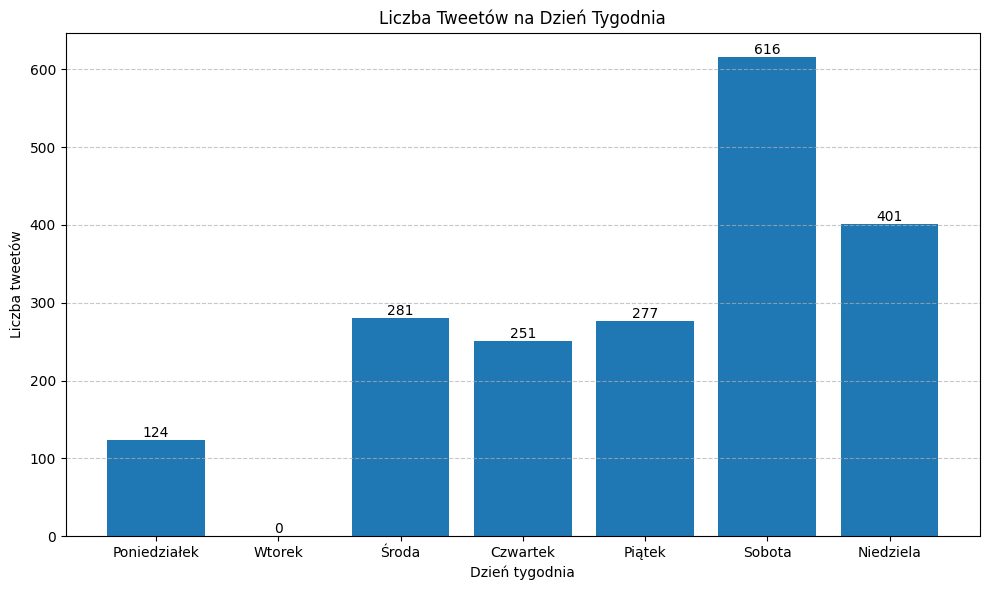

In [135]:
# WykorzystujƒÖc pakiet matplotlib wykonaj wykres ilustrujƒÖcy liczbƒô tweet√≥w per dzie≈Ñ tygodnia
# tu potrzebne sƒÖ dane z zad 7 z czƒô≈õci 2
import matplotlib.pyplot as plt


poniedzialki = 0
wtorki = 0
srody = 0
czwartki = 0
piatki = 0
soboty = 0
niedziele = 0

for date in df_tweety["created_at"]:
    if "Mon" in date or "Poniedzia≈Çek" in date:
        poniedzialki += 1
    elif "Tue" in date or "Wtorek" in date:
        wtorki += 1
    elif "Wed" in date or "≈öroda" in date:
        srody += 1
    elif "Thu" in date or "Czwartek" in date:
        czwartki += 1
    elif "Fri" in date or "PiƒÖtek" in date:
        piatki += 1
    elif "Sat" in date or "Sobota" in date:
        soboty += 1
    elif "Sun" in date or "Niedziela" in date:
        niedziele += 1


dniTygodnia = ["Poniedzia≈Çek", "Wtorek", "≈öroda", "Czwartek", "PiƒÖtek", "Sobota", "Niedziela"]
liczbaTweetow = [poniedzialki, wtorki, srody, czwartki, piatki, soboty, niedziele]


# Tworzenie wykresu
plt.figure(figsize=(10, 6))
bars = plt.bar(dniTygodnia, liczbaTweetow)

# Dodawanie warto≈õci nad s≈Çupkami
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), liczbaTweetow[i], ha="center", va="bottom")

# Ustawienia wykresu
plt.title('Liczba Tweet√≥w na Dzie≈Ñ Tygodnia')
plt.xlabel('Dzie≈Ñ tygodnia')
plt.ylabel('Liczba tweet√≥w')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()